<a href="https://colab.research.google.com/github/Danieloliver1/Datascience/blob/main/precos_semestrais_ceara_2022_012.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

link: https://www.gov.br/anp/pt-br/centrais-de-conteudo/dados-abertos/serie-historica-de-precos-de-combustiveis

Trabalho preços de combustivel

Nome: Daniel Oliveira dos Santos Matricula: 01511053    
Nome: Samara Taís Fiuza Gonçalves Matricula: 01587735     
Nome: Esmael ferreira lima neto Matricula: 01469277



Importar os dados
Verificar os dados
Formatar os dados

comparar os preços por municipios
Media de preços
Mediana de preços
Soma dos gastos

Exibir no Graficos
Media
Mediana
Soma


Um projeto de aprendizado de máquina em Python utilizando as bibliotecas Pandas, Matplotlib e Scikit-learn. O objetivo é treinar três modelos de aprendizado de máquina (árvore de decisão, regressão logística e vetores de suporte) para prever os melhores preços de combustíveis em cada município do Ceará, a partir de dados disponíveis em um arquivo CSV.

Uma coluna para mostrar os melhores preços e treinou as máquinas para identificar esses preços em cada município. Agora, você pode usar esses modelos para fazer previsões para novos dados e identificar os melhores preços de combustíveis em cada município.

É importante lembrar que o desempenho do modelo pode variar dependendo dos dados utilizados para o treinamento e da escolha dos hiperparâmetros. Por isso, é importante avaliar o desempenho do modelo utilizando métricas adequadas e fazer ajustes para melhorar sua precisão e generalização para novos dados.

Espero que este resumo tenha sido útil! Se tiver mais dúvidas, não hesite em perguntar.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#para tratamento dados dados
import pandas as pd

#para tratamento de graficos
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:

df = pd.read_csv(r'/content/drive/MyDrive/precos_semestrais_ceara_2022-01.csv')

In [ ]:
df.head()

,Regiao - Sigla,Estado - Sigla,Municipio,Revenda,CNPJ da Revenda,Nome da Rua,Numero Rua,Complemento,Bairro,Cep,Produto,Data da Coleta,Valor de Venda,Valor de Compra,Unidade de Medida,Bandeira,Coluna1
0,NE,CE,ITAPIPOCA,SAO PEDRO COM VAREJ COMBUSTIVEIS LTDA.,01.632.155/0002-94,AVENIDA MONSENHOR TABOSA,2771,NaN,JULHO,62505-650,GASOLINA,1/3/2022,7.12,NaN,R$ / litro,ALESAT,NaN
1,NE,CE,ITAPIPOCA,SAO PEDRO COM VAREJ COMBUSTIVEIS LTDA.,01.632.155/0002-94,AVENIDA MONSENHOR TABOSA,2771,NaN,JULHO,62505-650,ETANOL,1/3/2022,5.96,NaN,R$ / litro,ALESAT,NaN
2,NE,CE,ITAPIPOCA,SAO PEDRO COM VAREJ COMBUSTIVEIS LTDA.,01.632.155/0002-94,AVENIDA MONSENHOR TABOSA,2771,NaN,JULHO,62505-650,GASOLINA ADITIVADA,1/3/2022,7.13,NaN,R$ / litro,ALESAT,NaN
3,NE,CE,ITAPIPOCA,SAO PEDRO COM VAREJ COMBUSTIVEIS LTDA.,01.632.155/0002-94,AVENIDA MONSENHOR TABOSA,2771,NaN,JULHO,62505-650,DIESEL S10,1/3/2022,6.07,NaN,R$ / litro,ALESAT,NaN
4,NE,CE,ITAPIPOCA,COMERCIAL ITAPIPOQUENSE DE COMBUSTIVEIS LTDA,23.463.268/0005-99,AVENIDA ANASTACIO BRAGA,2000,NaN,FAZENDINHA,62500-000,ETANOL,1/3/2022,5.97,NaN,R$ / litro,VIBRA ENERGIA,NaN


In [ ]:
#formatando a tabela

#valores vazio
df.drop(['Coluna1'], axis = 1, inplace=True)
df.drop(['Valor de Compra'], axis = 1, inplace=True)
df.drop(['Complemento'], axis = 1, inplace=True)
df.drop(['Regiao - Sigla'], axis = 1, inplace=True)
df.drop(['Estado - Sigla'], axis = 1, inplace=True)
df.drop(['CNPJ da Revenda'], axis = 1, inplace=True)
df.drop(['Nome da Rua'], axis = 1, inplace=True)
df.drop(['Numero Rua'], axis = 1, inplace=True)


In [ ]:

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19765 entries, 0 to 19764
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Municipio          19765 non-null  object 
 1   Revenda            19765 non-null  object 
 2   Bairro             19655 non-null  object 
 3   Cep                19765 non-null  object 
 4   Produto            19765 non-null  object 
 5   Data da Coleta     19765 non-null  object 
 6   Valor de Venda     19765 non-null  float64
 7   Unidade de Medida  19765 non-null  object 
 8   Bandeira           19765 non-null  object 
dtypes: float64(1), object(8)
memory usage: 1.4+ MB


In [ ]:
# Filtrar apenas os dados de gasolina
df_gasolina = df[df['Produto'] == 'GASOLINA']

# Agrupar por município e calcular a média, mediana e soma dos valores de venda
grupo_municipio = df_gasolina.groupby('Municipio')['Valor de Venda'].agg(['mean', 'median', 'sum'])

# Exibir o resultado
print(grupo_municipio)

                       mean  median       sum
Municipio                                    
CANINDE            7.745714    7.78    379.54
CAUCAIA            7.073010    7.19   3713.33
CRATEUS            7.882636    7.89    867.09
CRATO              7.234291    7.39   1786.87
FORTALEZA          7.126322    7.29  18678.09
ICO                7.746923    7.75    503.55
IGUATU             7.451164    7.64   1728.67
ITAPIPOCA          7.613376    7.83   1195.30
JUAZEIRO DO NORTE  7.114215    7.14   1856.81
LIMOEIRO DO NORTE  7.580800    7.87    947.60
MARACANAU          7.057500    7.19   1834.95
QUIXADA            7.007302    6.97    441.46
SOBRAL             7.858144    7.99   2074.55


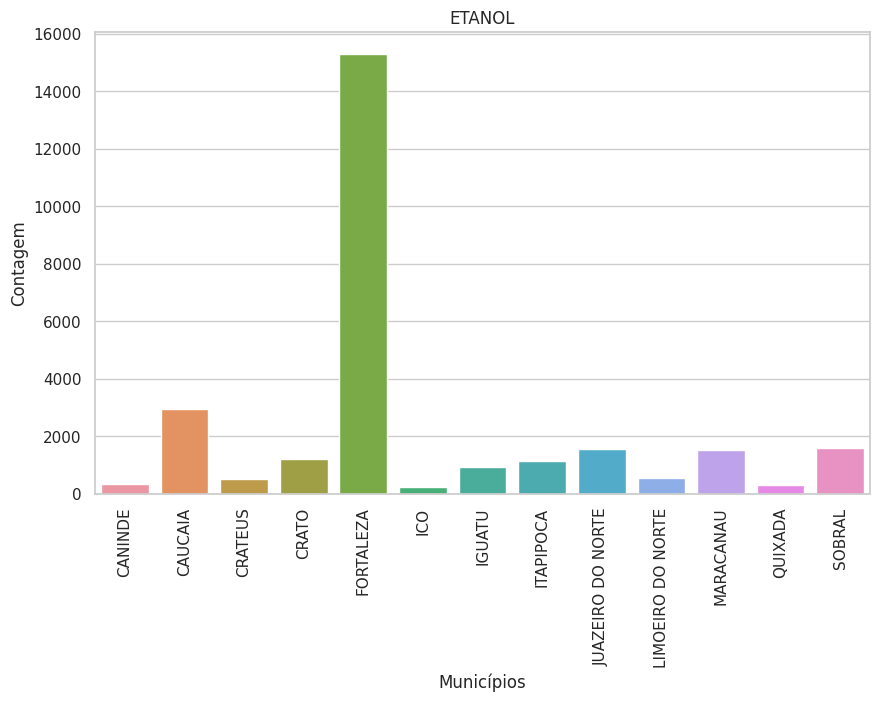

In [ ]:
# Filtrar apenas os dados de etanol
df_etanol = df[df['Produto'] == 'ETANOL']

# Agrupar por município e calcular a média, mediana e soma dos valores de venda
grupo_muni_etanol = df_etanol.groupby('Municipio')['Valor de Venda'].agg('sum')

# Exibir o resultado
# print(grupo_muni_etanol)

plt.figure(figsize=(10,6))

sns.barplot(x=grupo_muni_etanol.index.tolist(), y=grupo_muni_etanol.values)

# Definir os rótulos do eixo x

plt.xticks(rotation=90)
plt.title('ETANOL')
plt.xlabel('Municípios')
plt.ylabel('Contagem')

plt.show()

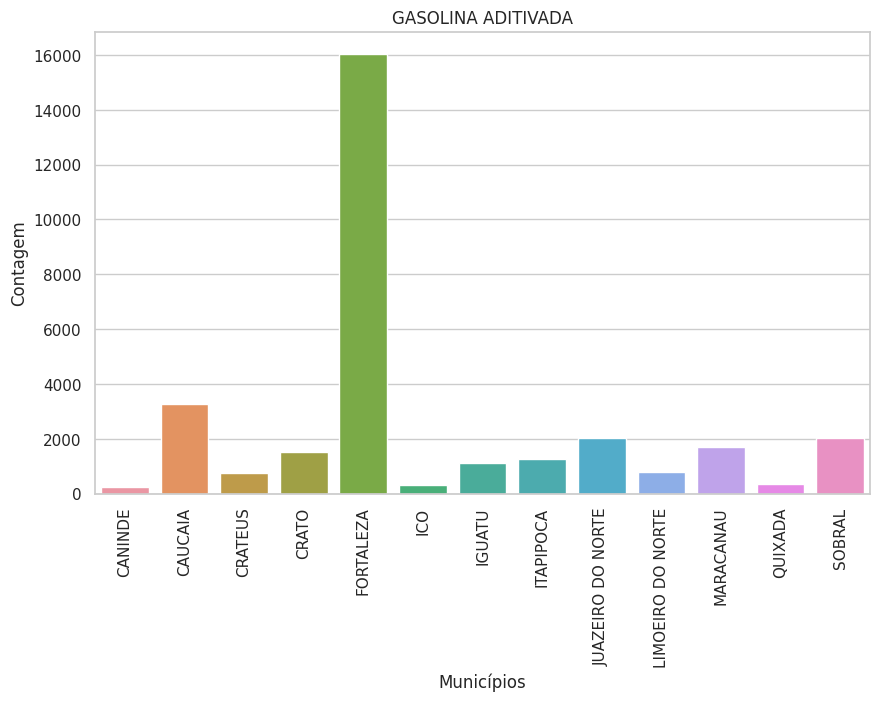

In [ ]:
# Filtrar apenas os dados de etanol
df_gasolina_aditivada = df[df['Produto'] == 'GASOLINA ADITIVADA']

# Agrupar por município e calcular a média, mediana e soma dos valores de venda
grupo_muni_aditivada = df_gasolina_aditivada.groupby('Municipio')['Valor de Venda'].agg('sum')

# Exibir o resultado
# print(grupo_muni_aditivada)

plt.figure(figsize=(10,6))

sns.barplot(x=grupo_muni_aditivada.index.tolist(), y=grupo_muni_aditivada.values)

# Definir os rótulos do eixo x

plt.xticks(rotation=90)

plt.title('GASOLINA ADITIVADA')
plt.xlabel('Municípios')
plt.ylabel('Contagem')

plt.show()


In [ ]:
display(df_gasolina)
# df_gasolina.info()

,Municipio,Revenda,Bairro,Cep,Produto,Data da Coleta,Valor de Venda,Unidade de Medida,Bandeira
0,ITAPIPOCA,SAO PEDRO COM VAREJ COMBUSTIVEIS LTDA.,JULHO,62505-650,GASOLINA,1/3/2022,7.12,R$ / litro,ALESAT
7,ITAPIPOCA,BALEIA DISTRIBUIDORA DE DERIVADOS DE PETROLEO ...,VIOLETE,62500-001,GASOLINA,1/3/2022,7.10,R$ / litro,SP
11,MARACANAU,BEZERRA & MENDES COMERCIAL DE PETRÓLEO LTDA.,PARQUE LUZARDO VIANA,61910-000,GASOLINA,1/3/2022,6.77,R$ / litro,IPIRANGA
15,MARACANAU,LUIZA GLAURIA R T MENEZES,KAGADO,61901-410,GASOLINA,1/3/2022,6.47,R$ / litro,VIBRA ENERGIA
18,MARACANAU,POSTO BOTO LTDA,PIRATININGA,61905-000,GASOLINA,1/3/2022,6.75,R$ / litro,RAIZEN
...,...,...,...,...,...,...,...,...,...
19748,CAUCAIA,"POSTO PLANALTO COMERCIO, SERVICOS E DERIVADOS ...",PLANALTO CAUCAIA,61605-730,GASOLINA,6/30/2022,7.27,R$ / litro,BRANCA
19752,CAUCAIA,POSTO XIMENES MOTOS LTDA,PARQUE GUADALAJARA (JUREMA),61650-350,GASOLINA,6/30/2022,6.99,R$ / litro,RAIZEN
19756,JUAZEIRO DO NORTE,AUTO POSTO TIRADENTES PETROLEO LTDA,TIRADENTES,63031-185,GASOLINA,6/30/2022,7.15,R$ / litro,BRANCA
19760,CAUCAIA,C4 POTIRA COMERCIAL DE DERIVADOS DE PETROLEO LTDA,TABAPUA BRASILIA II (JUREMA),61648-160,GASOLINA,6/30/2022,6.99,R$ / litro,BRANCA


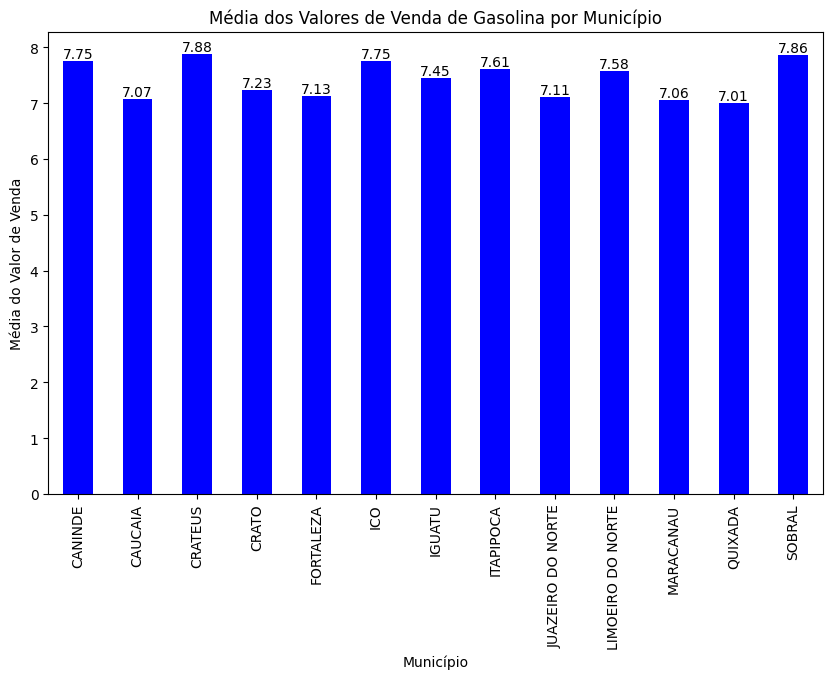

In [ ]:
# Criar um gráfico de barras para a média
fig, ax1 = plt.subplots(figsize=(10, 6))
grupo_municipio['mean'].plot(kind='bar', ax=ax1, color='blue')
ax1.set_xlabel('Município')
ax1.set_ylabel('Média do Valor de Venda')
ax1.set_title('Média dos Valores de Venda de Gasolina por Município')

# Adicionar os valores em cima das barras
for i, valor in enumerate(grupo_municipio['mean']):
    ax1.annotate(f'{valor:.2f}', (i, valor), ha='center', va='bottom')

# Exibir os gráficos
plt.show()


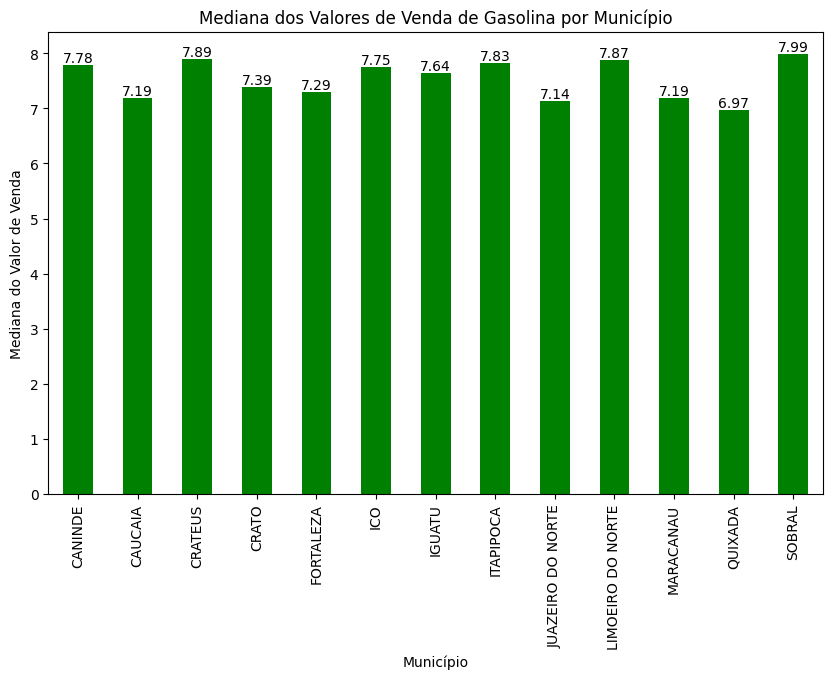

In [ ]:
# Criar um gráfico de barras para a mediana
fig, ax2 = plt.subplots(figsize=(10, 6))
grupo_municipio['median'].plot(kind='bar', ax=ax2, color='green')
ax2.set_xlabel('Município')
ax2.set_ylabel('Mediana do Valor de Venda')
ax2.set_title('Mediana dos Valores de Venda de Gasolina por Município')

# Adicionar os valores em cima das barras
for i, valor in enumerate(grupo_municipio['median']):
    ax2.annotate(f'{valor:.2f}', (i, valor), ha='center', va='bottom')


# Exibir os gráficos
plt.show()

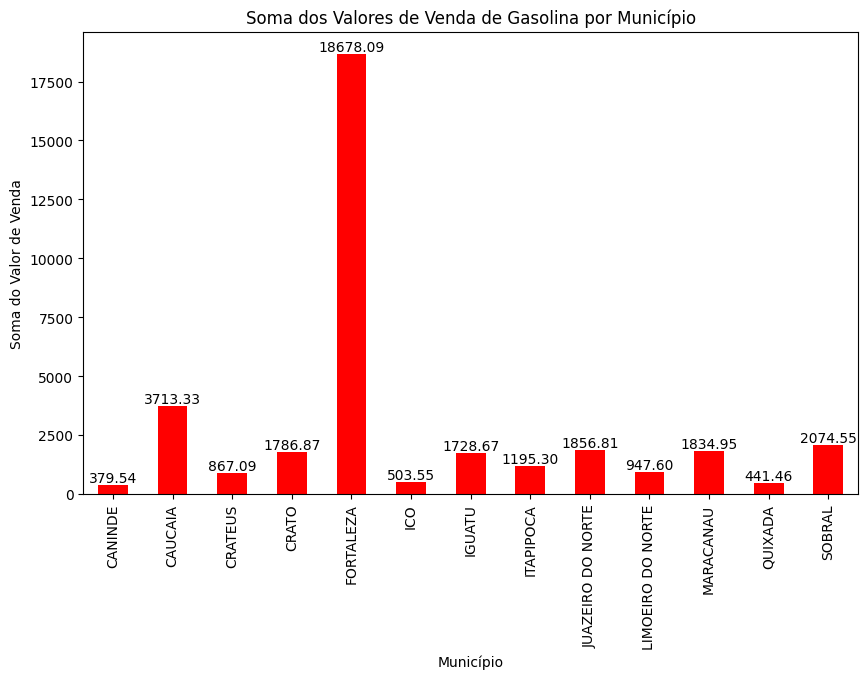

In [ ]:
# Criar um gráfico de barras para a soma
fig, ax3 = plt.subplots(figsize=(10, 6))
grupo_municipio['sum'].plot(kind='bar', ax=ax3, color='red')
ax3.set_xlabel('Município')
ax3.set_ylabel('Soma do Valor de Venda')
ax3.set_title('Soma dos Valores de Venda de Gasolina por Município')


# Adicionar os valores em cima das barras
for i, valor in enumerate(grupo_municipio['sum']):
    ax3.annotate(f'{valor:.2f}', (i, valor), ha='center', va='bottom')

# Exibir os gráficos
plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1507: UserWarning: 
The palette list has fewer values (3) than needed (7) and will cycle, which may produce an uninterpretable plot.
  func(x=vector, **plot_kwargs)


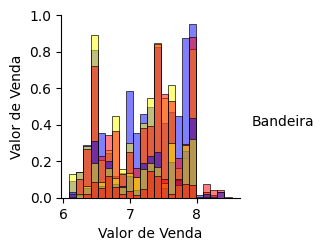

In [ ]:

sns.pairplot(df_gasolina, hue="Bandeira", diag_kind="hist",palette=['red','yellow','blue'])

In [ ]:
df_gasolina.head(10)

,Municipio,Revenda,Bairro,Cep,Produto,Data da Coleta,Valor de Venda,Unidade de Medida,Bandeira
0,ITAPIPOCA,SAO PEDRO COM VAREJ COMBUSTIVEIS LTDA.,JULHO,62505-650,GASOLINA,1/3/2022,7.12,R$ / litro,ALESAT
7,ITAPIPOCA,BALEIA DISTRIBUIDORA DE DERIVADOS DE PETROLEO ...,VIOLETE,62500-001,GASOLINA,1/3/2022,7.10,R$ / litro,SP
11,MARACANAU,BEZERRA & MENDES COMERCIAL DE PETRÓLEO LTDA.,PARQUE LUZARDO VIANA,61910-000,GASOLINA,1/3/2022,6.77,R$ / litro,IPIRANGA
15,MARACANAU,LUIZA GLAURIA R T MENEZES,KAGADO,61901-410,GASOLINA,1/3/2022,6.47,R$ / litro,VIBRA ENERGIA
18,MARACANAU,POSTO BOTO LTDA,PIRATININGA,61905-000,GASOLINA,1/3/2022,6.75,R$ / litro,RAIZEN
22,MARACANAU,SILVEIRA PETROLEO LTDA,SIQUEIRA II,61901-410,GASOLINA,1/3/2022,6.87,R$ / litro,BRANCA
26,MARACANAU,CAUIPE REVENDEDORA DE PETROLEO LTDA,SIQUEIRA,61901-410,GASOLINA,1/3/2022,6.47,R$ / litro,RAIZEN
30,MARACANAU,LV COMERCIO DE PETROLEO LTDA,CAGADO,61912-000,GASOLINA,1/3/2022,6.75,R$ / litro,BRANCA
34,ITAPIPOCA,DISTRIBUIDORA DE DERIVADOS DE PETROLEO AMONTAD...,DESERTO,62502-974,GASOLINA,1/3/2022,7.11,R$ / litro,SP
38,MARACANAU,POSTO DE COMBUSTIVEL JATOBA LTDA - ME,SIQUEIRA,61900-970,GASOLINA,1/3/2022,6.74,R$ / litro,RAIZEN


In [ ]:
nova_tabela = df_gasolina[['Municipio','Revenda','Bairro','Valor de Venda']]
# nova_tabela1 = pd.pivot_table(nova_tabela, values='Valor de Venda', index='Bandeira', columns='Municipio')
nova_tabela.head(10)



,Municipio,Revenda,Bairro,Valor de Venda
0,ITAPIPOCA,SAO PEDRO COM VAREJ COMBUSTIVEIS LTDA.,JULHO,7.12
7,ITAPIPOCA,BALEIA DISTRIBUIDORA DE DERIVADOS DE PETROLEO ...,VIOLETE,7.10
11,MARACANAU,BEZERRA & MENDES COMERCIAL DE PETRÓLEO LTDA.,PARQUE LUZARDO VIANA,6.77
15,MARACANAU,LUIZA GLAURIA R T MENEZES,KAGADO,6.47
18,MARACANAU,POSTO BOTO LTDA,PIRATININGA,6.75
22,MARACANAU,SILVEIRA PETROLEO LTDA,SIQUEIRA II,6.87
26,MARACANAU,CAUIPE REVENDEDORA DE PETROLEO LTDA,SIQUEIRA,6.47
30,MARACANAU,LV COMERCIO DE PETROLEO LTDA,CAGADO,6.75
34,ITAPIPOCA,DISTRIBUIDORA DE DERIVADOS DE PETROLEO AMONTAD...,DESERTO,7.11
38,MARACANAU,POSTO DE COMBUSTIVEL JATOBA LTDA - ME,SIQUEIRA,6.74


In [ ]:

mediana_preco_municipio = nova_tabela.groupby('Municipio')['Valor de Venda'].median()

menor_preco_municipio = nova_tabela.groupby('Municipio')['Valor de Venda'].min()

max_preco_municipio = nova_tabela.groupby('Municipio')['Valor de Venda'].max()

menor_preco_municipio.head()

Municipio
CANINDE      7.14
CAUCAIA      6.27
CRATEUS      6.98
CRATO        6.35
FORTALEZA    6.17
Name: Valor de Venda, dtype: float64

In [ ]:
nova_tabela['status'] = nova_tabela.apply(lambda row: 'melhor_preço' if row['Valor de Venda'] == menor_preco_municipio[row['Municipio']] else 'barato' if row['Valor de Venda'] <= mediana_preco_municipio[row['Municipio']] else 'caro', axis=1)


<ipython-input-19-d0fe1918f2db>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nova_tabela['status'] = nova_tabela.apply(lambda row: 'melhor_preço' if row['Valor de Venda'] == menor_preco_municipio[row['Municipio']] else 'barato' if row['Valor de Venda'] <= mediana_preco_municipio[row['Municipio']] else 'caro', axis=1)


In [ ]:
nova_tabela.head(10)


,Municipio,Revenda,Bairro,Valor de Venda,status
0,ITAPIPOCA,SAO PEDRO COM VAREJ COMBUSTIVEIS LTDA.,JULHO,7.12,barato
7,ITAPIPOCA,BALEIA DISTRIBUIDORA DE DERIVADOS DE PETROLEO ...,VIOLETE,7.10,melhor_preço
11,MARACANAU,BEZERRA & MENDES COMERCIAL DE PETRÓLEO LTDA.,PARQUE LUZARDO VIANA,6.77,barato
15,MARACANAU,LUIZA GLAURIA R T MENEZES,KAGADO,6.47,barato
18,MARACANAU,POSTO BOTO LTDA,PIRATININGA,6.75,barato
22,MARACANAU,SILVEIRA PETROLEO LTDA,SIQUEIRA II,6.87,barato
26,MARACANAU,CAUIPE REVENDEDORA DE PETROLEO LTDA,SIQUEIRA,6.47,barato
30,MARACANAU,LV COMERCIO DE PETROLEO LTDA,CAGADO,6.75,barato
34,ITAPIPOCA,DISTRIBUIDORA DE DERIVADOS DE PETROLEO AMONTAD...,DESERTO,7.11,barato
38,MARACANAU,POSTO DE COMBUSTIVEL JATOBA LTDA - ME,SIQUEIRA,6.74,barato


In [ ]:
#sempre segue um padrão para aprendizado de maquina

#1-passo
from sklearn.model_selection import train_test_split

#definir o x e y

x = nova_tabela.drop('status',axis=1)

y = nova_tabela['status']


In [ ]:
from sklearn.preprocessing import LabelEncoder

# codificar as features categóricas
le = LabelEncoder()
x = x.apply(le.fit_transform)


,Municipio,Revenda,Bairro,Valor de Venda
0,7,281,91,74
7,7,37,175,72
11,10,39,120,47
15,10,153,95,21
18,10,215,134,45
...,...,...,...,...
19748,1,249,136,88
19752,1,261,118,63
19756,8,32,163,77
19760,1,45,161,63


In [ ]:
# transformando as colunas tipos object em numeros binarios é um preprocessamento
from sklearn.preprocessing import OneHotEncoder


onehot = OneHotEncoder(sparse=False,drop='first')
# variavel x_bin é a coluna transformada
x_bin = onehot.fit_transform(x)
x_bin

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.]])

In [ ]:

#separando os dados para trainamento e teste da maquina predentiva
x_treino, x_teste, y_treino, y_teste = train_test_split(x_bin,y, test_size=1/3, random_state=42)


In [ ]:
# Treinando Regressão logistica
# Treinando Árvores de Decisão
# Treinando Máquina de Vetores de Suporte (SVM))


#importar a inteligencia artificial
from sklearn.linear_model import LogisticRegression  # treinar regressão logistica
from sklearn.tree import DecisionTreeClassifier    # treinar arvore de decisão
from sklearn.svm import SVC                        # treinar maquina de vetores de suporte


# #criar a inteligencia artificial
#aqui estou criando uma variavel e instanciando a função
modelo_rogisticregression = LogisticRegression()# regressão linear
modelo_arvoredecisao = DecisionTreeClassifier() # arvore de decisão
modelo_maquinavetoressuporte = SVC()            # maquina de vetores de suporte



#treinar a inteligencia artificial
modelo_rogisticregression.fit(x_treino,y_treino)    # regressão linear
modelo_arvoredecisao.fit(x_treino,y_treino)         # arvore de decisão
modelo_maquinavetoressuporte.fit(x_treino,y_treino) # maquina de vetores de suporte




previsao_rogisticregression= modelo_rogisticregression.predict(x_teste)       # regressão logistica
previsa_arvoredecisao = modelo_arvoredecisao.predict(x_teste)                  # arvore de decisão
previsao_maquinavetoressuporte = modelo_maquinavetoressuporte.predict(x_teste) # maquina de vetores de suporte


In [ ]:
# from sklearn.metrics import r2_score
from sklearn.metrics import accuracy_score

accuracy_previsao_rogisticregression = accuracy_score(y_teste,previsao_rogisticregression)             # regressão logistica
accuracy_arvoredecisao = accuracy_score(y_teste,previsa_arvoredecisao)                   # arvore de decisão
accuracy_maquinavetoressuporte = accuracy_score(y_teste, previsao_maquinavetoressuporte) # maquina de vetores de suporte



print("Acurácia (Regressão logisitica): {:.2f}%".format(accuracy_previsao_rogisticregression * 100))
print("Acurácia (Árvores de Decisão): {:.2f}%".format(accuracy_arvoredecisao * 100))
print("Acurácia (Máquina de Vetores de Suporte (SVM))): {:.2f}%".format(accuracy_maquinavetoressuporte * 100))


Acurácia (Regressão logisitica): 95.72%
Acurácia (Árvores de Decisão): 97.89%
Acurácia (Máquina de Vetores de Suporte (SVM))): 96.99%


<ipython-input-66-f9b0fd0a20e7>:24: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df.iloc[:, 1] = df.iloc[:, 1].astype(float)


<Axes: xlabel='0', ylabel='1'>

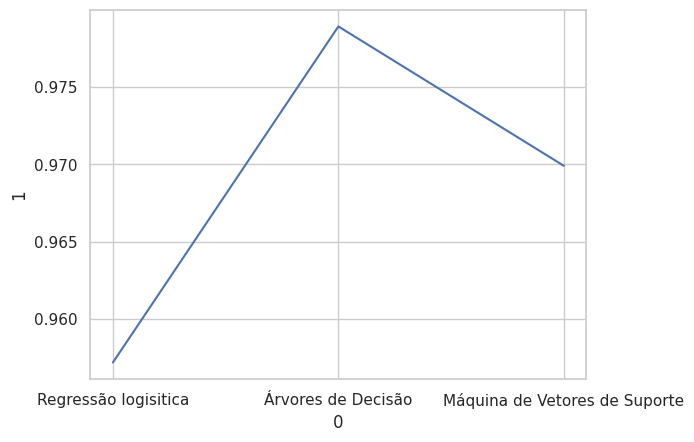

In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

indice = np.array(['Regressão logisitica','Árvores de Decisão','Máquina de Vetores de Suporte'])

x = float('{:.4f}'.format(accuracy_previsao_rogisticregression ))
y = float('{:.4f}'.format(accuracy_arvoredecisao ))
z = float('{:.4f}'.format(accuracy_maquinavetoressuporte ))



coluna = np.array([x,y,z])

# Adicionar uma nova dimensão (coluna)
coluna = coluna[:, np.newaxis]

# Criar a matriz com a coluna e o índice
matriz = np.concatenate((indice[:, np.newaxis], coluna), axis=1)

# transformando em dataframe
df = pd.DataFrame(matriz)

df.iloc[:, 1] = df.iloc[:, 1].astype(float)

# sns.lineplot(df.iloc[0],df.iloc[1])
sns.lineplot(x=df.loc[:, 0], y=df.loc[:, 1])


Testando novo modelo

In [ ]:
novo_df = pd.DataFrame({'Municipio': ['MARACANAU'],
                        'Revenda': ['LUIZA GLAURIA R T MENEZES'],
                        'Bairro': ['KAGADO'],
                        'Valor de Venda': 6.47})
novo_df


,Municipio,Revenda,Bairro,Valor de Venda
0,MARACANAU,LUIZA GLAURIA R T MENEZES,KAGADO,6.47


In [ ]:
# Aplicar as mesmas etapas de pré-processamento aos dados da nova planilha
novo_x = novo_df #.drop('status', axis=1)
le = LabelEncoder()

novo_x = novo_x.apply(le.fit_transform)  # Usar o mesmo LabelEncoder aplicado anteriormente

# codificar as features categóricas
novo_x_bin = onehot.transform(novo_x)  # Usar o mesmo OneHotEncoder aplicado anteriormente




In [ ]:
# Fazer previsões nos novos dados
novo_y_pred = modelo_arvoredecisao.predict(novo_x_bin)


In [ ]:
novo_y_pred

array(['barato'], dtype=object)